In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#step1:upload csv file
!gdown --id 1Db3cWDkOvKiWQGqwIIBM5fRvkG0PegZ6
df = pd.read_csv('diabetest.csv')

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:139: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Db3cWDkOvKiWQGqwIIBM5fRvkG0PegZ6
To: /content/diabetest.csv
100% 23.9k/23.9k [00:00<00:00, 23.2MB/s]


In [3]:
# step2: discover data
df.shape

(768, 9)

In [4]:
# step2:discover data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
#step3: cleaning dataset
#missing value
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


<Axes: >

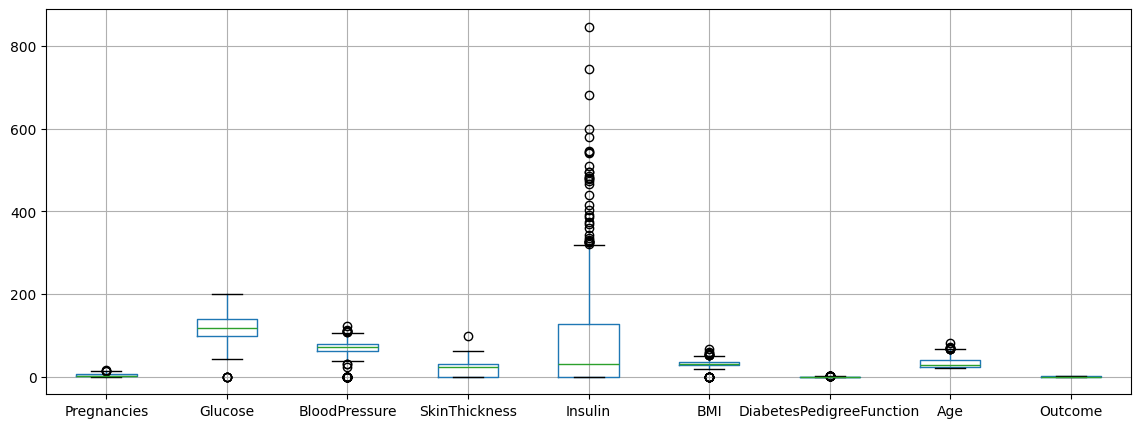

In [6]:
#step3:cleaning dataset
#outliers
plt.figure(figsize=(14,5))
df.boxplot()

In [7]:
#count the outliers
print(df['Insulin'].describe())

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64


In [8]:
def Discover_outliers(df,column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 -Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  #identify outlier
  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
  #replace outlier with median
  df.loc[outliers.index, column] = df[column].median()
  return df

for column in df.columns:
    if column != "Outcome":
        df = Discover_outliers(df, column)

/tmp/ipython-input-242161159.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '30.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[outliers.index, column] = df[column].median()


<Axes: >

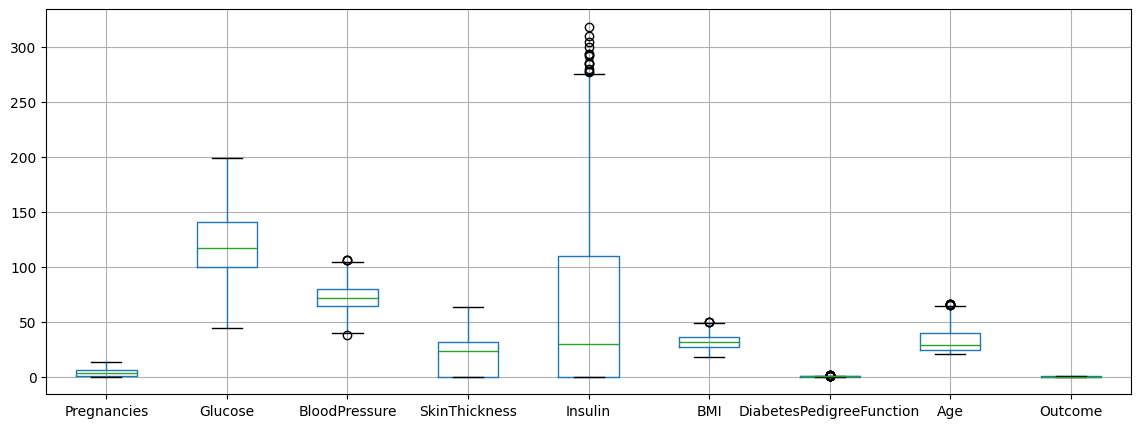

In [9]:
#step3:cleaning dataset
#outliers
plt.figure(figsize=(14,5))
df.boxplot()

In [10]:
#count the outliers
print(df['Insulin'].describe())

count    768.000000
mean      60.919271
std       77.635666
min        0.000000
25%        0.000000
50%       29.750000
75%      110.000000
max      318.000000
Name: Insulin, dtype: float64


In [11]:
#فصل الخصائص عن الهدف
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [12]:
#تقسيم البيانات
#80% تدريب
#20% اختبار
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [13]:
#للتأكيد
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(614, 8) (154, 8)
(614,) (154,)


In [14]:
#تطبيق ال scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# stdv للتأكيد
X_train_scaled.mean(axis=0)
X_train_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [16]:
#للتأكيد على ال Mean
X_train_scaled.mean(axis=0)

array([ 3.61636164e-17,  9.83650367e-17, -6.22014203e-16,  1.04151215e-16,
       -2.74843485e-17,  1.41761376e-16,  2.05409341e-16, -2.16981699e-16])

In [17]:
#استيراد النموذج
from sklearn.linear_model import LogisticRegression

In [18]:
#انشاء النموذج
log_model = LogisticRegression(max_iter=1000)

In [19]:
#تدريب النموذج
log_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [20]:
#التنبؤ
y_pred = log_model.predict(X_test_scaled)

In [21]:
#التقييم
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7467532467532467
Confusion Matrix:
 [[79 20]
 [19 36]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.80        99
           1       0.64      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.72      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



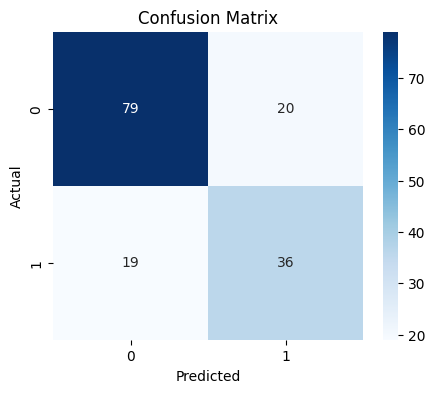

In [22]:
from sklearn.metrics import confusion_matrix
#import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

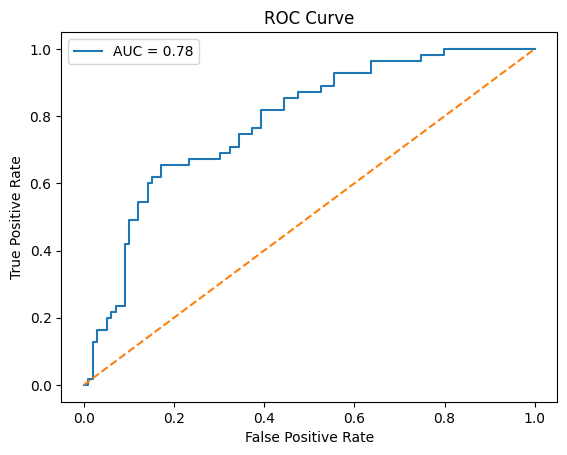

In [23]:
#ٌRoc Curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_proba = log_model.predict_proba(X_test_scaled)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

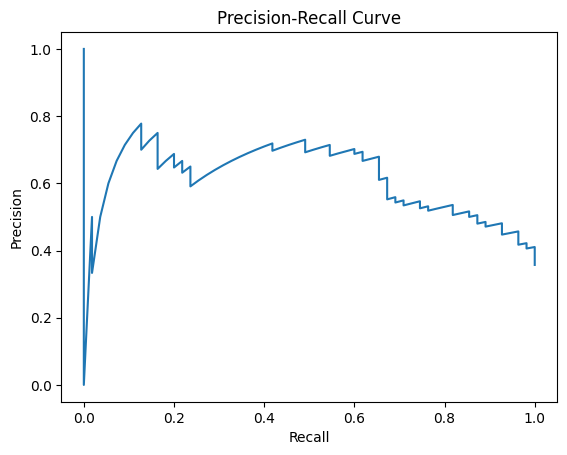

In [24]:
#Precesion Recall Curve
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_proba)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()